# Store Sales Analysis

# In this project, we focused to answer the following questions:
 - Which store has minimum and maximum sales?
 - Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard
   deviation
 - Which store/s has good quarterly growth rate in Q3’2012
 - Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday
   season for all stores together
 - Provide a monthly and semester view of sales in units and give insights
 - Build prediction to forecast demand.

# Data Understanding
*There are sales data available for 45 stores of Walmart in Kaggle. This is the data that covers sales from 2010-02-05 to 2012-   11-01.*

**The data contains these features:**

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Walmart_Store_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [13]:
# Checking Null Values
# No NUll Values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
df['Date']

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [21]:
df = df.set_index('Date', drop = True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667


**Which store has minimum and maximum sales?**

In [113]:
min_max_sales = df.groupby(['Store']).sum()
max_sales = min_max_sales[min_max_sales['Weekly_Sales'] == min_max_sales['Weekly_Sales'].max()]
max_sales

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,3.013978e+08,10,7929.55,488.718,29892.45268,1054.112


In [136]:
min_sales = min_max_sales[min_max_sales['Weekly_Sales'] == min_max_sales['Weekly_Sales'].min()]
min_sales

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
33,37160221.96,10,10972.13,511.357,18401.192733,1220.241


<AxesSubplot:title={'center':'STORE NUMBER vs TOTAL SALES'}, xlabel='Store', ylabel='Total Sales'>

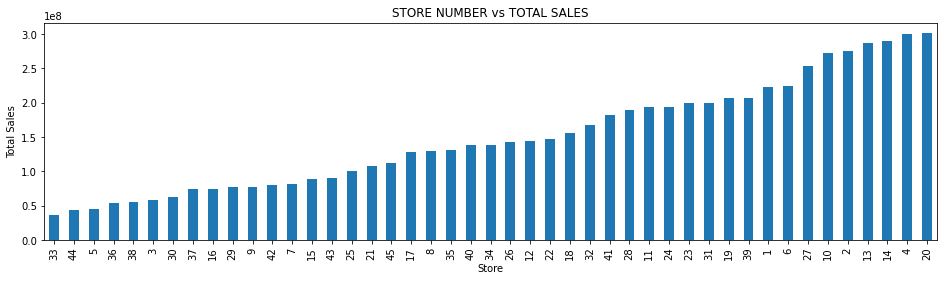

In [132]:
plt.figure(figsize = (16,4))
plt.title('STORE NUMBER vs TOTAL SALES')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values().plot(kind = "bar")

**Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation**

In [201]:
std_dvtn = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(std_dvtn.head(1).index[0]))

The store has maximum standard deviation is 14


C:\Users\SKSHAHBAZALI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


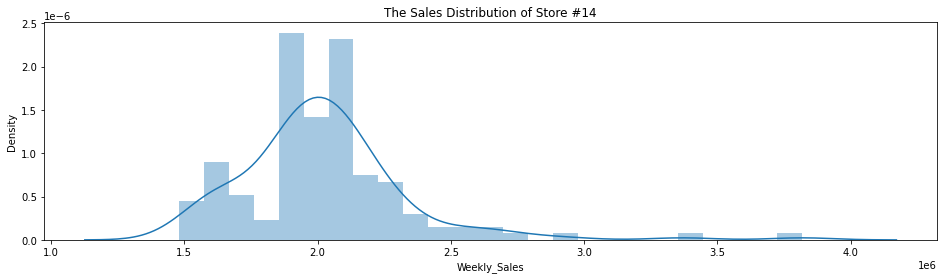

In [204]:
plt.figure(figsize=(16,4))
sns.distplot(df[df['Store'] == std_dvtn.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(std_dvtn.head(1).index[0]));

In [211]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
print(coef_mean_std[coef_mean_std['Coefficient of mean to standard deviation'] == coef_mean_std['Coefficient of mean to standard deviation'].max()])
coef_mean_std.head()

       Coefficient of mean to standard deviation
Store                                           
35                                      0.229681


,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668


C:\Users\SKSHAHBAZALI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

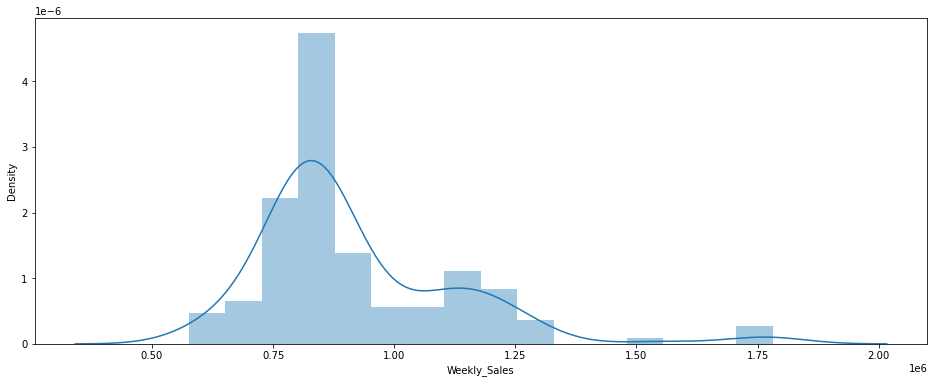

In [215]:
plt.figure(figsize=(16,6))
sns.distplot(df[df['Store']==35]['Weekly_Sales'])

**Which store/s has good quarterly growth rate in Q3’2012**

In [216]:
df.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106
12-03-2010,1,1439541.59,0,57.79,2.667,211.380643,8.106
19-03-2010,1,1472515.79,0,54.58,2.720,211.215635,8.106
26-03-2010,1,1404429.92,0,51.45,2.732,211.018042,8.106
02-04-2010,1,1594968.28,0,62.27,2.719,210.820450,7.808


In [ ]:
df1 = df.reset_index()
df1['Date'] = pd.to_datetime(df1['Date'])
Q3_df = df1[(df1['Date'] > '2012-06-30-') & (df1['Date'] < '2012-10-01')].groupby('Store')['Weekly_Sales'].sum()
Q3_df = pd.DataFrame(data = Q3_df)
Q2_df = df1[(df1['Date'] > '2012-03-31') & (df1['Date'] < '2012-05-31')].groupby('Store')['Weekly_Sales'].sum()
Q2_df = pd.DataFrame(data = Q2_df)

<Figure size 1080x360 with 0 Axes>

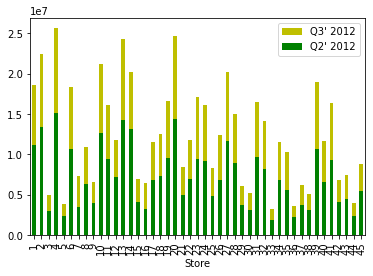

<Figure size 1080x360 with 0 Axes>

In [275]:

Q2_df.plot(ax = Q3_df.plot(kind = 'bar',legend=True, color ='y'),kind='bar',color='g',legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])
plt.figure(figsize = (15,5))

**Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
Holiday Events:**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [278]:
df1

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,2012-10-19,45,718125.53,0,56.47,3.969,192.330854,8.667


In [286]:
df2 = df1.copy()
df2['Date'] = df2['Date'].astype(str)
df2['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
6435 non-null   object
dtypes: object(1)
memory usage: 50.4+ KB


In [303]:
total_sales = df2.groupby('Date')['Weekly_Sales'].sum()
total_sales

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
df2['month'] = df2['Date'].apply(lambda x: getMonth(x))
df2
 g = df1.groupby(pd.Grouper(freq="M")) 

In [ ]:
total_sales = df2.groupby('Date')['Weekly_Sales'].sum()


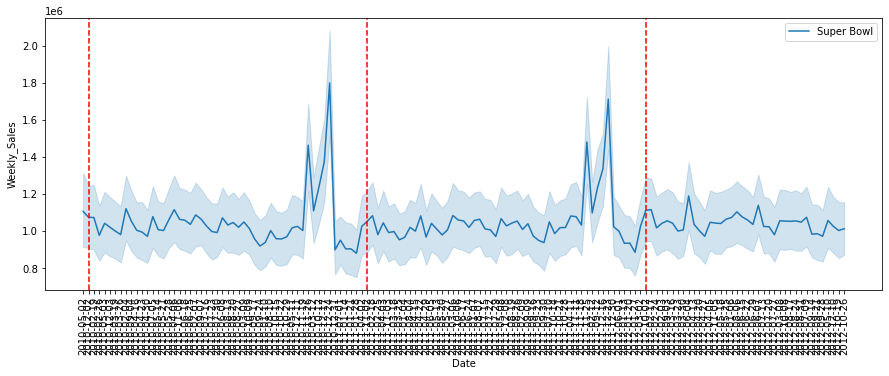

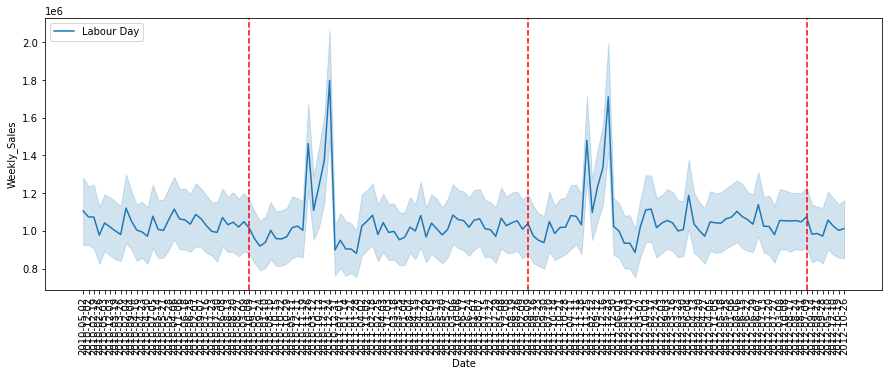

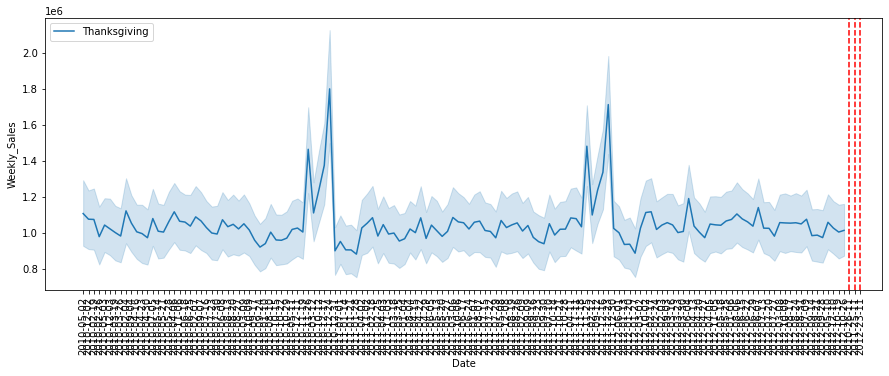

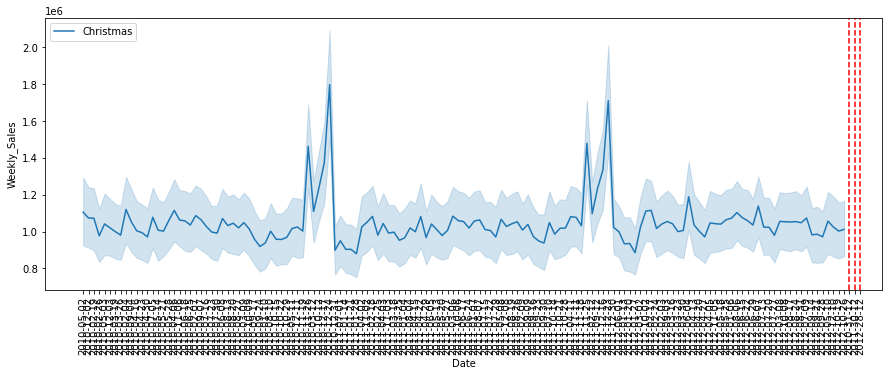

In [313]:
def plot_line(df,holiday_dates,holiday_label): 
    fig, ax = plt.subplots(figsize = (15,5))
    plt.xticks(rotation = 90)
    sns.lineplot(x = df2['Date'],y = df2['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        plt.axvline(x=day, linestyle='--', c='r')
        
        
    

#     plt.title(holiday_label)
#     x_dates = df2['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
#     xfmt = x_dates.DateFormatter('%Y-%m-%d')
#     ax.xaxis.set_major_formatter(xfmt)
#     ax.xaxis.set_major_locator(dates.DayLocator(1))
#     plt.gcf().autofmt_xdate(rotation=90)
#     plt.show()
    
total_sales = df2.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['2010-12-02','2011-11-02','2012-10-02',]
Labour_Day =  ['2010-10-09','2011-09-09', '2012-07-09']
Thanksgiving =  ['2010-26-11', '2011-25-11','2012-23-11']
Christmas = ['2010-31-12','2011-30-12','2012-28-12']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

